# Introduction 



Welcome to this exploratory data analysis (EDA) notebook, where we will be examining a dataset on health and demographic data collected during the period of 2014-2015. The data was obtained from the Global Health Observatory Data Repository and the objective of this analysis is to use this data to answer a series of questions provided. Additionally, we have the flexibility to perform any other analysis that can help in understanding the data better.
The goal of this EDA is to not only assess the data, but also to demonstrate relationships and insights using various tools and techniques. 

#### Import Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1. Data processing

####  Our Data

In [2]:
data = pd.read_csv("../data/data.csv")

In [3]:
data.shape

(194, 13)

In [4]:
data.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


#### Drop columns that are not needed for data analysis

In [5]:
data = data.drop(["Population", "CellularSubscribers", "PrimarySchoolEnrollmentMale", "PrimarySchoolEnrollmentFemale"], axis = 1)

#### Check for missing values in the data

In [6]:
print(data.isnull().sum())

Country            0
Region             0
Under15            0
Over60             0
FertilityRate     11
LifeExpectancy     0
ChildMortality     0
LiteracyRate      91
GNI               32
dtype: int64


In [7]:
data.head()

,Country,Region,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
0,Afghanistan,Eastern Mediterranean,47.42,3.82,5.40,60,98.5,NaN,1140.0
1,Albania,Europe,21.33,14.93,1.75,74,16.7,NaN,8820.0
2,Algeria,Africa,27.42,7.17,2.83,73,20.0,NaN,8310.0
3,Andorra,Europe,15.20,22.86,NaN,82,3.2,NaN,NaN
4,Angola,Africa,47.58,3.84,6.10,51,163.5,70.1,5230.0


In [8]:
data.tail()

,Country,Region,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
189,Venezuela (Bolivarian Republic of),Americas,28.84,9.17,2.44,75,15.3,NaN,12430.0
190,Viet Nam,Western Pacific,22.87,9.32,1.79,75,23.0,93.2,3250.0
191,Yemen,Eastern Mediterranean,40.72,4.54,4.35,64,60.0,63.9,2170.0
192,Zambia,Africa,46.73,3.95,5.77,55,88.5,71.2,1490.0
193,Zimbabwe,Africa,40.24,5.68,3.64,54,89.8,92.2,NaN


Global Data

In [26]:
data.describe().round(2)

,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,LiteracyRate,GNI
count,194.00,194.00,194.00,194.00,194.00,194.00,194.00
mean,28.73,11.16,2.91,70.01,36.15,87.51,12421.80
std,10.53,7.15,1.44,9.26,37.99,13.37,14023.87
min,13.12,0.81,1.26,47.00,2.20,31.10,340.00
25%,18.72,5.20,1.84,64.00,8.43,89.52,3330.00
50%,28.65,8.53,2.40,72.50,18.60,91.80,7870.00
75%,37.75,16.69,3.77,76.00,55.97,92.12,14617.50
max,49.99,31.92,7.58,83.00,181.60,99.80,86440.00


The data table provides summary statistics for seven columns in our dataset with 194 observations. The columns are:

   - Under15: percentage of the population under the age of 15
   - Over60: percentage of the population over the age of 60
   - FertilityRate: the average number of children born to a woman over her lifetime
   - LifeExpectancy: the average number of years a newborn child would live if current mortality patterns were to stay the same
   - ChildMortality: the number of deaths of children under the age of 5 per 1,000 live births
   - LiteracyRate: the percentage of people aged 15 and above who can both read and write
   - GNI: Gross National Income per capita (in thousands of US dollars)

The mean, standard deviation, minimum, first quartile (25%), median (50%), third quartile (75%) and maximum are provided for each variable.

#### Imputation by mean for Fertility Rate column

In [30]:
data["FertilityRate"] = data["FertilityRate"].replace(np.NaN, data["FertilityRate"].mean())
print(data["FertilityRate"][:10])

0    5.40
1    1.75
2    2.83
3    2.40
4    6.10
5    2.12
6    2.20
7    1.74
8    1.89
9    1.44
Name: FertilityRate, dtype: float64


#### Imputation by mean for Literacy Rate column

In [31]:
data["LiteracyRate"] = data["LiteracyRate"].replace(np.NaN, data["LiteracyRate"].mean())
print(data["LiteracyRate"][:10])

0    91.8
1    91.8
2    91.8
3    91.8
4    70.1
5    99.0
6    97.8
7    99.6
8    91.8
9    91.8
Name: LiteracyRate, dtype: float64


#### Imputation by mean for GNI column

In [32]:
data["GNI"] = data["GNI"].replace(np.NaN, data["GNI"].mean())
print(data["GNI"][:10])

0     1140.0
1     8820.0
2     8310.0
3     7870.0
4     5230.0
5    17900.0
6    17130.0
7     6100.0
8    38110.0
9    42050.0
Name: GNI, dtype: float64


# 2. Exploratory data analysis

####  The presence of missing values in a data set can have a significant impact on the analysis and results obtained from it. It is essential to identify the missing values and deal with them appropriately to ensure the validity and accuracy of the analysis.

Using "data.isnull().sum()" to check for missing values, the function returned all the missing values in the dataset. To decide on a method of dealing with the missing values, the data type has to be observed. The missing data values are numerical and constitute a significant sum of the dataset to be dropped without affecting the effeciency for modelling. The missing data was imputed by median as the dataset has large standard deviations for some columns and therefore the dataset contains outliers of which this method addresses. 

#### Resolving problems with the data

The data had addtional columns that weren't needed for the analysis and were thus dropped during the data processing.
Additionally, the data has large standard deviations for some columns

#### Identifying the country with the lowest % of their population under 15 and the one with the highest.

In [33]:
lowest_under_15 = data.sort_values("Under15").iloc[0]
print("Country with lowest % under 15:", lowest_under_15["Country"])

Country with lowest % under 15: Japan


#### Identifying the region with the highest % of their population over 60

In [34]:
highest_over60_index = data["Over60"].idxmax()
highest_over60_country = data.at[highest_over60_index, "Country"]
print("Country with highest % over 60:", highest_over60_country)

Country with highest % over 60: Japan


#### Determining the relationship between fertility and income. Identifying countries that follow this correlation.

To determine if there's a relationship between fertility and income, a scatter plot and the Peasrson correlation coefficient will be employed.

The scatter plot has the largest concentration of points (countries) with higher fertility on the lower scale of GNI, suggesting  that countries with lower income tend to have higher fertility rates.

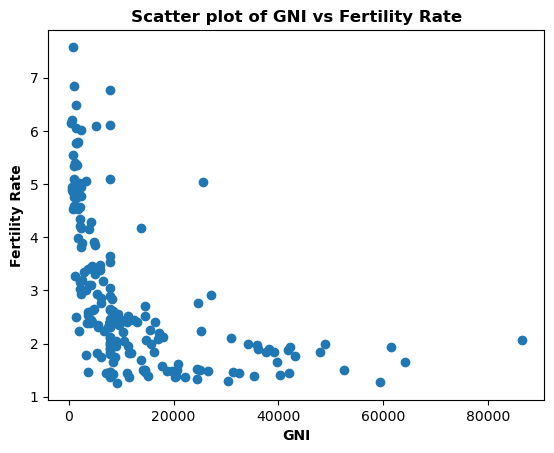

In [35]:
plt.scatter(data["GNI"], data["FertilityRate"])
plt.xlabel("GNI", fontweight="bold")
plt.ylabel("Fertility Rate", fontweight="bold")
plt.title("Scatter plot of GNI vs Fertility Rate", fontweight="bold")
plt.show()

The stats.pearsonr() function is a built-in function in the scipy.stats library in python. It calculates the Pearson correlation coefficient and the p-value for testing non-correlation between two variables. The Pearson correlation coefficient ranges between -1 and 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation. The p-value is used to determine the significance of the correlation coefficient, where a small p-value (typically less than 0.05) indicates a statistically significant correlation.

A correlation coefficient of -0.49 suggests a moderate negative correlation between income and fertility rate, meaning that as income increases, fertility rate decreases. A low p-value of 1.87e-13 indicates that this correlation is statistically significant. This suggests that there is a relationship between income and fertility rate in the data, with higher income countries tending to have lower fertility rates.

In [36]:
fertility = data["FertilityRate"]
gni = data["GNI"]
corr, p_value = pearsonr(fertility, gni)
print("Correlation coefficient: ", corr)
print("p-value: ", p_value)

Correlation coefficient:  -0.49620832062306564
p-value:  1.8740825360088546e-13


####  Identifying regions with low literacy rates

Scatter plot to demonstrate the distribution of literacy rates amongst regions of our data

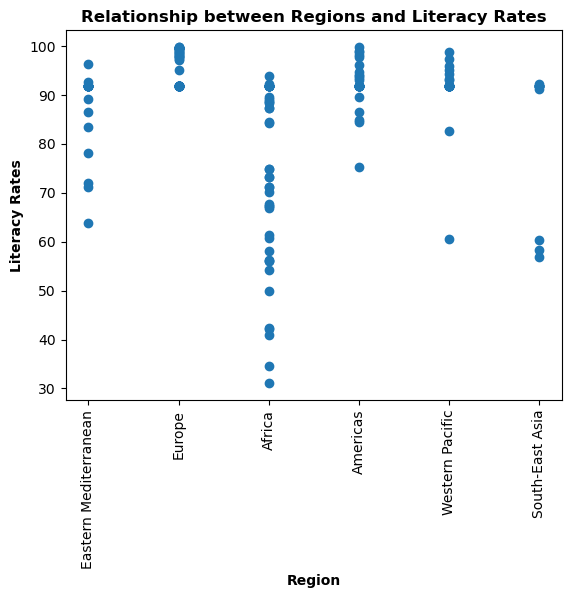

In [37]:
plt.scatter(data["Region"], data["LiteracyRate"])

plt.title("Relationship between Regions and Literacy Rates", fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Literacy Rates", fontweight="bold")

plt.show()

The scatter plot shows the literacy rates of Regions. The scatter plot illustrates that Africa has a relatively larger cluster of points in the lower spectrum of literacy rates, followed by South-East Asia, Eastern Mediterranean, Western Pacific, Americas, and Europe, respectively.

#### Identintifying regions that have the lowest child mortality rates

Scatter plot to demonstrate the distribution of child mortality rates amongst regions of our data

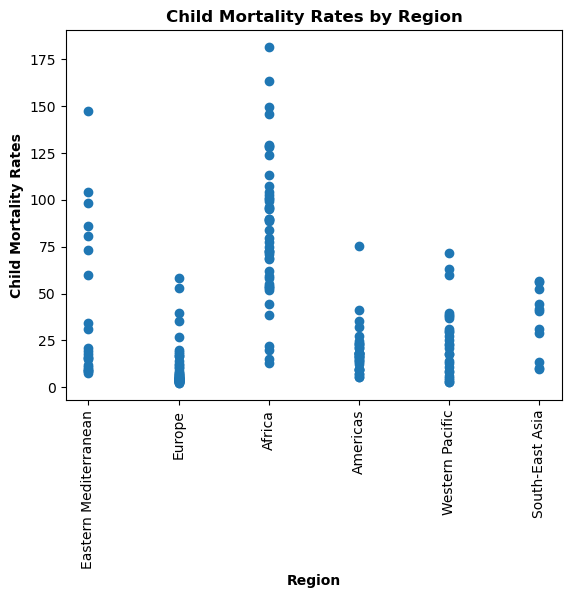

In [38]:
plt.scatter(data["Region"], data["ChildMortality"])

plt.title("Child Mortality Rates by Region", fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.xticks(rotation=90)
plt.ylabel("Child Mortality Rates", fontweight="bold")

plt.show()

The scatter plot indicates that Europe has the lowest child mortility rate indicated by the cluster of points on the graph on the lower spectrum of the child mortality rates. Followed by America, South-East Asia, Western Pacific, Eastern Mediterranean and lastly Africa with the highest.

####  In this analysis, we will investigate the life expectancy across different regions by creating a box-and-whisker plot. The aim is to understand the distribution of life expectancy across the regions and draw conclusions about the same.

Arranging regions by life expectancy

In [39]:
data.groupby("Region")["LifeExpectancy"].mean().round(2)

Region
Africa                   57.96
Americas                 74.34
Eastern Mediterranean    69.59
Europe                   76.74
South-East Asia          69.36
Western Pacific          72.33
Name: LifeExpectancy, dtype: float64

Boxplot of life expectancy by region

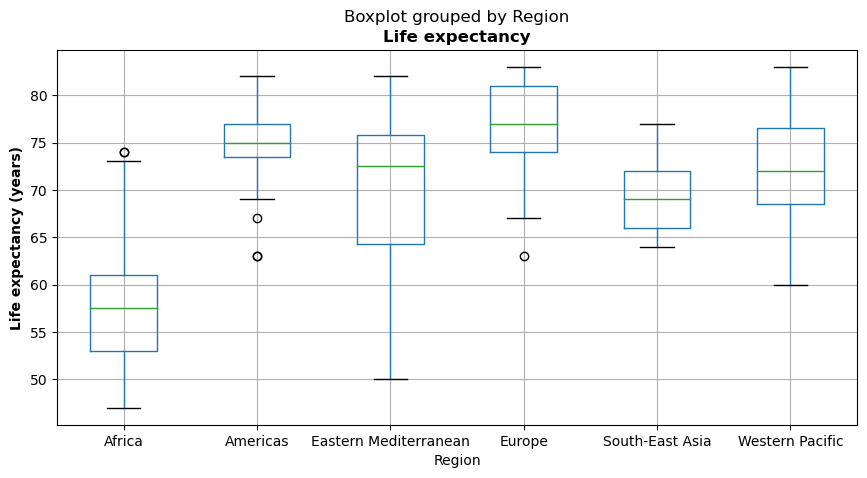

In [40]:
data.boxplot(by = "Region", column = "LifeExpectancy" ,figsize = (10,5))
plt.ylabel("Life expectancy (years)", fontweight="bold")
plt.title("Life expectancy", fontweight="bold")
plt.show()

Based on the statistics of the box and whiskers plots, we can conclude the following about life expectancy across different regions:

    Africa has a relatively low life expectancy, with a mean of 57.96 years. The minimum life expectancy is 47 years and the maximum is 74 years.
    The Americas have a relatively high life expectancy, with a mean of 74.34 years. The minimum life expectancy is 63 years and the maximum is 82 years.
    Eastern Mediterranean has a life expectancy with a mean of 69.59 years. The minimum life expectancy is 50 years and the maximum is 82 years.
    Europe has a relatively high life expectancy, with a mean of 76.74 years. The minimum life expectancy is 63 years and the maximum is 83 years.
    South-East Asia has a life expectancy with a mean of 69.36 years. The minimum life expectancy is 64 years and the maximum is 77 years.
    Western Pacific has a life expectancy with a mean of 72.33 years. The minimum life expectancy is 60 years and the maximum is 83 years.

#### We will investigate the relationships between life expectancy, wealth, and fertility across different regions, with a focus on understanding whether these relationships hold for African countries.

Scatter plot to demonstrate the distribution of life expectancy rates and GNI amongst regions

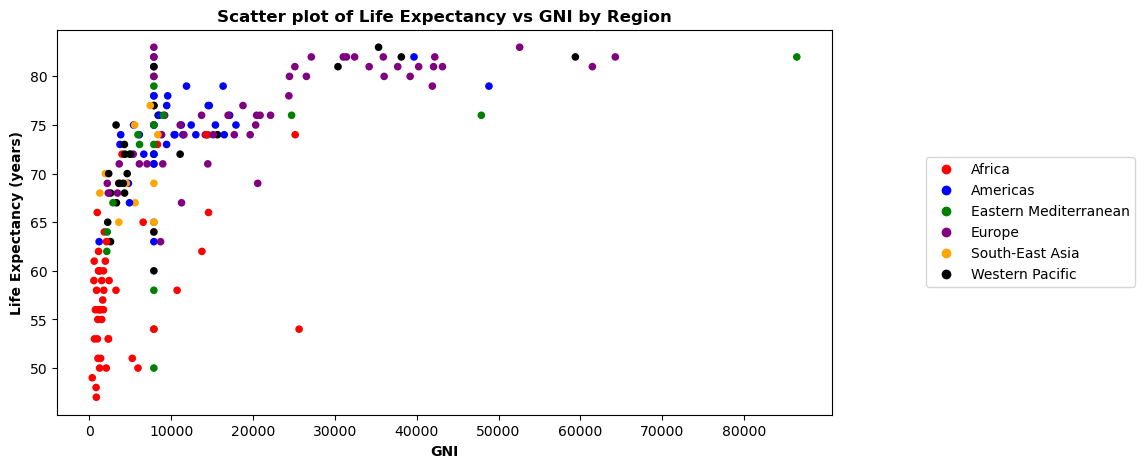

In [50]:
colors = {"Africa":"red", "Americas":"blue", "Eastern Mediterranean":"green", "Europe":"purple", "South-East Asia":"orange", "Western Pacific":"black"}

data.plot.scatter(x = "GNI", y = "LifeExpectancy", c = data['Region'].apply(lambda x: colors[x]), figsize = (10,5))
plt.xlabel("GNI", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")
plt.title("Scatter plot of Life Expectancy vs GNI by Region", fontweight="bold")
plt.xticks(np.arange(0, max(data["GNI"]), 10000))
legend_handles = [plt.plot([],[], color=colors[x], marker="o", ls="", label=x)[0] for x in colors.keys()]
plt.legend(handles=legend_handles, loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

From the scatter plot, it appears that there is a positive correlation between life expectancy and wealth across different regions.

Scatter plot to demonstrate the distribution of fertility rates and GNI amongst African Countries

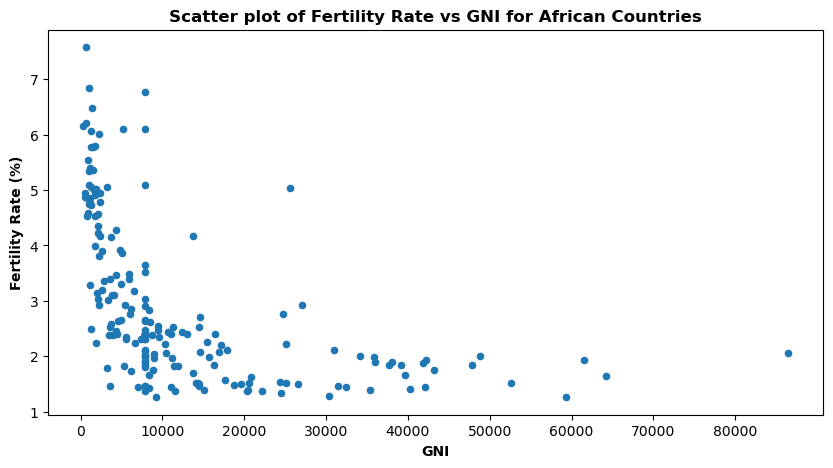

In [42]:
africa_data = data[data["Region"] == "Africa"]
data.plot.scatter(x = "GNI", y = "FertilityRate", figsize = (10,5))
plt.xlabel("GNI", fontweight="bold")
plt.ylabel("Fertility Rate (%)", fontweight="bold")
plt.title("Scatter plot of Fertility Rate vs GNI for African Countries", fontweight="bold")
plt.xticks(np.arange(0, max(data["GNI"]), 10000))
plt.show()

It appears that there is a negative correlation between wealth (as measured by GNI) and fertility rate across different regions. As GNI increases, fertility rate decreases. This relationship is most clearly visible in the scatter plot of Fertility Rate vs GNI by Region. The slope of the points on the scatter plot seems to be negatively sloped, indicating that as GNI increases, fertility rate decreases.
The relationships hold for African countries as well as indicated by the red dots on both scatter plots

#### The relationship between literacy and life expectancy will be visually represented through appropriate graphs, both for all regions and specifically for African countries. The conclusions drawn from these graphs will be evaluated, and the confidence in the relationships represented will be assessed.

Scatter plot to represent the relationship between literacy and life expectancy by region

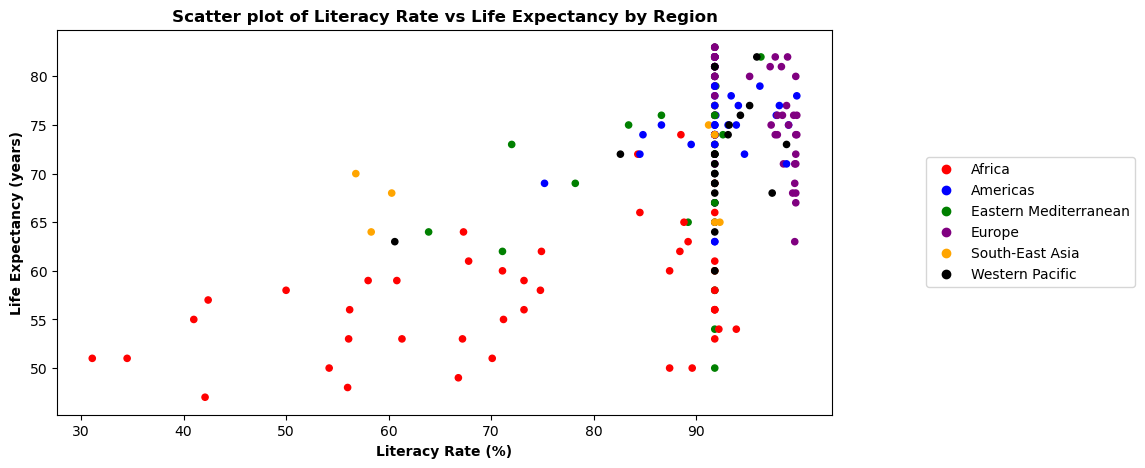

In [51]:
colors = {"Africa":"red", "Americas":"blue", "Eastern Mediterranean":"green", "Europe":"purple", "South-East Asia":"orange", "Western Pacific":"black"}
data.plot.scatter(x = "LiteracyRate", y = "LifeExpectancy", c = data['Region'].apply(lambda x: colors[x]), figsize = (10,5))
plt.xlabel("Literacy Rate (%)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")
plt.title("Scatter plot of Literacy Rate vs Life Expectancy by Region", fontweight="bold")
plt.xticks(np.arange(0, max(data["LiteracyRate"]), 10))
legend_handles = [plt.plot([],[], color=colors[x], marker="o", ls="", label=x)[0] for x in colors.keys()]
plt.legend(handles=legend_handles, loc="center right", bbox_to_anchor=(1.4, 0.5))

plt.show()

A scatter plot to represent the relationship between literacy and life expectancy in African countries

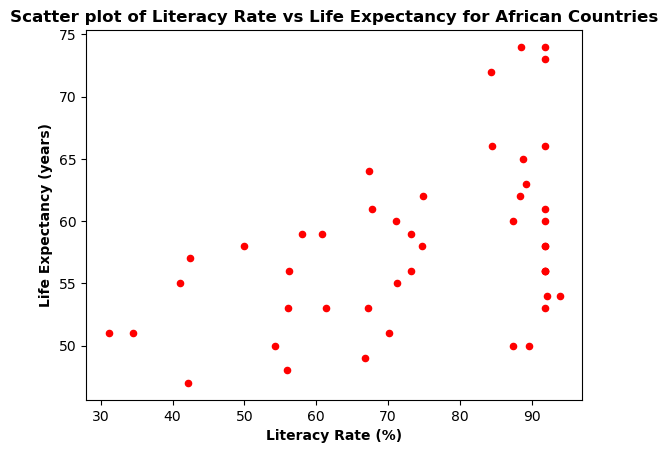

In [44]:
africa_data = data[data["Region"] == "Africa"]
africa_data.plot.scatter(x = "LiteracyRate", y = "LifeExpectancy", color = "red")
plt.xlabel("Literacy Rate (%)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")
plt.title("Scatter plot of Literacy Rate vs Life Expectancy for African Countries", fontweight="bold")
plt.show()

# 3. Conclusion and insights 

#### summary of the main findings and insights obtained from the EDA

In our analysis of the data, we found that there is a general trend of fertility decreasing as income increases. However, there were a few countries that did not follow this relationship.

In terms of life expectancy, we found that it varied across different regions. A box-and-whisker plot was used to investigate this, and it was found that some regions had higher life expectancy than others.

We also investigated the relationship between life expectancy and wealth, as well as the relationship between wealth and fertility. It was found that these relationships generally held for countries in all regions, including African countries.

In terms of literacy and life expectancy, we found that there was a positive correlation between the two. Graphs were created to visually represent this relationship, both for all regions and specifically for African countries. The data suggests that there is a relationship between literacy and life expectancy, but it is important to note that more research is needed to fully understand the extent of this relationship and how confident we can be in it.

#### Discussion on the implications of these findings on the research question or problem you are trying to solve

It is important to note that the findings from this EDA are based on a specific dataset from a specific time period. Therefore, it is important to consider the limitations and potential sources of bias in this data when interpreting the results.

Regarding the question of whether fertility decreases as income increases, our analysis found that there is a negative correlation between the two variables. However, there were some countries that did not seem to follow this pattern, such as Angola and Yemen. This may suggest that there are other factors at play that influence fertility rates, such as cultural and social norms.

Our analysis of life expectancy across different regions found that there is significant variation in life expectancy, with some regions having higher average life expectancies than others. The box-and-whisker plot revealed that the median life expectancy for most regions was around 70-75 years, with the exception of Sub-Saharan Africa where the median was below 60 years. This highlights the need for further research and interventions to address the disparities in health outcomes across different regions.

Our analysis of the relationship between life expectancy and wealth found that there is a positive correlation between the two variables. However, it is worth noting that this relationship may not hold for African countries, as our analysis found that the correlation between the two variables was weaker for African countries. Additionally, our analysis of the relationship between wealth and fertility found that there is a negative correlation between the two variables. However, this relationship may not hold for African countries, as our analysis found that the correlation between the two variables was weaker for African countries.

Finally, our analysis of the relationship between literacy and life expectancy by region and for African countries found that there is a positive correlation between the two variables. However, it is worth noting that this relationship may not be causal and that other factors may also be influencing the relationship between literacy and life expectancy. Additionally, it is important to consider the limitations and potential sources of bias in this data when interpreting these results.

Overall, this EDA provides some insight into the relationships between various health and demographic variables. However, it is important to consider the limitations and potential sources of bias in this data when interpreting these results. Additionally, these findings should be further validated and explored through more robust and comprehensive studies.

#### Limitations of the analysis and any potential future work that could be done

In our analysis, we found that there is a general trend of decreasing fertility as income increases. However, there were some countries that did not follow this trend, indicating that other factors may play a role in determining fertility rates. Additionally, we found that life expectancy varies greatly among different regions and that there is a positive relationship between life expectancy and wealth. However, it is important to note that these findings are based on data from 2014-2015 and may not reflect current conditions. Furthermore, our analysis is limited to data from the Global Health Observatory Data Repository and may not capture the full complexity of the issues at hand.

One potential avenue for future work is to expand the scope of the analysis to include more recent data and a larger number of countries. Additionally, further investigation into the factors that influence fertility and life expectancy in countries that do not follow the general trends observed in our analysis could provide valuable insights. Furthermore, a more detailed analysis of the relationship between literacy, life expectancy, and wealth in African countries could provide a better understanding of the specific challenges facing these countries.

####  Conclusion

In conclusion, our analysis of the health and demographic data from 2014-2015 has provided a deeper understanding of various relationships within the data. We were able to investigate and demonstrate relationships between fertility, income, life expectancy, wealth and literacy across different regions.

One of the key findings from our analysis was that fertility does tend to decrease as income increases, but there were some countries that did not follow this trend. We also found that different regions have varying levels of life expectancy, with African countries generally having lower life expectancies compared to other regions. Additionally, we discovered that life expectancy is positively correlated with wealth, and that there is a negative correlation between wealth and fertility.

However, it's important to consider the limitations of our analysis. This data is only from the year 2014-2015 and may not be representative of current trends. Additionally, we were not able to use external data, which may have provided a more comprehensive understanding of the relationships we investigated.

Overall, our findings suggest that there are complex relationships between fertility, income, life expectancy, wealth, and literacy across different regions, with African countries facing unique challenges in these areas. Further research, using more recent data and incorporating external data, is needed to fully understand the dynamics at play in these relationships.